# Predicting Whether a Planet Has a Shorter Year than Earth
Using the Open Exoplanet Catalogue database: https://github.com/OpenExoplanetCatalogue/open_exoplanet_catalogue/

## Data License
Copyright (C) 2012 Hanno Rein

Permission is hereby granted, free of charge, to any person obtaining a copy of this database and associated scripts (the "Database"), to deal in the Database without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Database, and to permit persons to whom the Database is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Database. A reference to the Database shall be included in all scientific publications that make use of the Database.

THE DATABASE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE DATABASE OR THE USE OR OTHER DEALINGS IN THE DATABASE.

## Setup

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

planets = pd.read_csv('../../ch_09/data/planets.csv')
planets.head()

,discoverymethod,description,periastrontime,discoveryyear,eccentricity,semimajoraxis,period,name,mass,periastron,list,lastupdate
0,RV,11 Com b is a brown dwarf-mass companion to th...,2452899.60,2008.0,0.231,1.290,326.03,11 Com b,19.400,94.800,Confirmed planets,15/09/20
1,RV,11 Ursae Minoris is a star located in the cons...,2452861.04,2009.0,0.080,1.540,516.22,11 UMi b,11.200,117.630,Confirmed planets,15/09/20
2,RV,14 Andromedae is an evolved star in the conste...,2452861.40,2008.0,0.000,0.830,185.84,14 And b,4.800,0.000,Confirmed planets,15/09/20
3,RV,The star 14 Herculis is only 59 light years aw...,NaN,2002.0,0.359,2.864,1766.00,14 Her b,4.975,22.230,Confirmed planets,15/09/21
4,RV,14 Her c is the second companion in the system...,NaN,2006.0,0.184,9.037,9886.00,14 Her c,7.679,189.076,Controversial,15/09/21


## EDA

<AxesSubplot:>

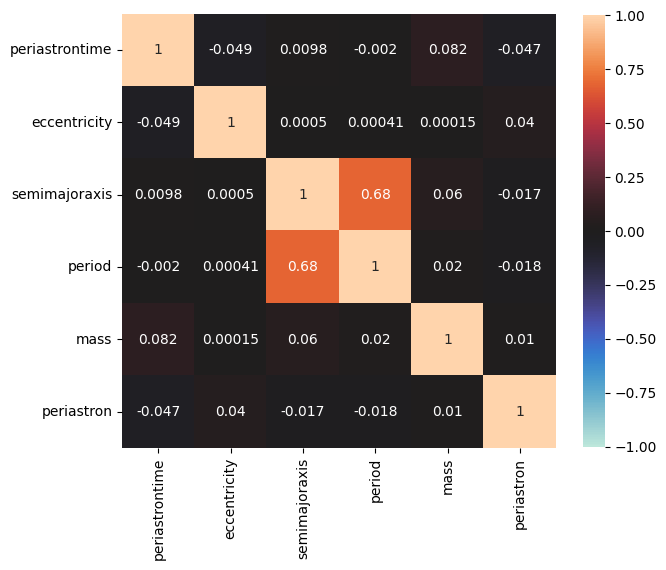

In [6]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
    planets.drop(columns='discoveryyear').corr(), 
    center=0, vmin=-1, vmax=1, square=True, annot=True,
    cbar_kws={'shrink': 0.8}
)

In [7]:
planets[['period', 'semimajoraxis', 'eccentricity', 'mass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5187 entries, 0 to 5186
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   period         4909 non-null   float64
 1   semimajoraxis  2600 non-null   float64
 2   eccentricity   2015 non-null   float64
 3   mass           2552 non-null   float64
dtypes: float64(4)
memory usage: 162.2 KB


In [8]:
planets[['period', 'semimajoraxis', 'eccentricity', 'mass']].describe()

,period,semimajoraxis,eccentricity,mass
count,4.909000e+03,2600.000000,2015.000000,2552.000000
mean,2.189080e+03,7.883031,0.286252,2.292662
std,1.149292e+05,159.148610,6.237088,7.157556
min,6.511500e-02,0.004420,-0.129287,0.000008
25%,4.444480e+00,0.050697,0.000000,0.030950
50%,1.184900e+01,0.118390,0.080000,0.520000
75%,4.252159e+01,1.050000,0.210000,2.090000
max,8.040000e+06,6471.000000,280.000000,263.000000


## Creating the `shorter_year_than_earth` column

In [9]:
planets['shorter_year_than_earth'] = planets.period < planets.query('name == "Earth"').period.iat[0]
planets.shorter_year_than_earth.value_counts()

True     4346
False     841
Name: shorter_year_than_earth, dtype: int64

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = planets[['shorter_year_than_earth', 'semimajoraxis', 'mass', 'eccentricity']].dropna()
y = data.pop('shorter_year_than_earth')
X = data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, stratify=y
)

lm = LogisticRegression(random_state=0).fit(X_train, y_train)
lm.score(X_test, y_test) 

0.9642857142857143

## Evaluation
Make predictions

In [11]:
preds = lm.predict(X_test)

Get performance metrics

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.97      0.91      0.94       130
        True       0.96      0.99      0.98       318

    accuracy                           0.96       448
   macro avg       0.97      0.95      0.96       448
weighted avg       0.96      0.96      0.96       448



In [4]:
from ml_utils.classification import plot_roc
from sklearn.metrics import roc_auc_score

# ROC curve is true positive rate against false positive rate
plot_roc(y_test, lm.predict_proba(X_test)[:,1])

probabilities = lm.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, probabilities)
print(f"AUC: {auc:.2f}")

NameError: name 'y_test' is not defined

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Actual', ylabel='Model Prediction'>

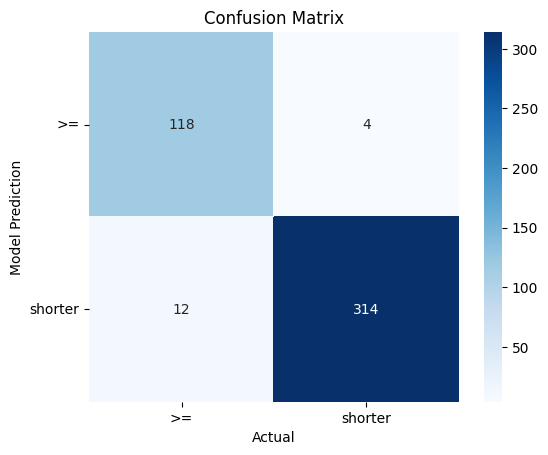

In [13]:
from ml_utils.classification import confusion_matrix_visual

confusion_matrix_visual(y_test, preds, ['>=', 'shorter'])

<hr>
<div>
    <a href="./exercise_2.ipynb">
        <button>&#8592; Previous Solution</button>
    </a>
    <a href="./exercise_4.ipynb">
        <button style="float: right;">Next Solution &#8594;</button>
    </a>
</div>
<hr>